# From Parameter Estimation to Hypothesis Testing:
# Building a Bayesian A/B Test

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from scipy.stats import norm, beta

Our initial Prior probability distribution will be Beta(3, 7)

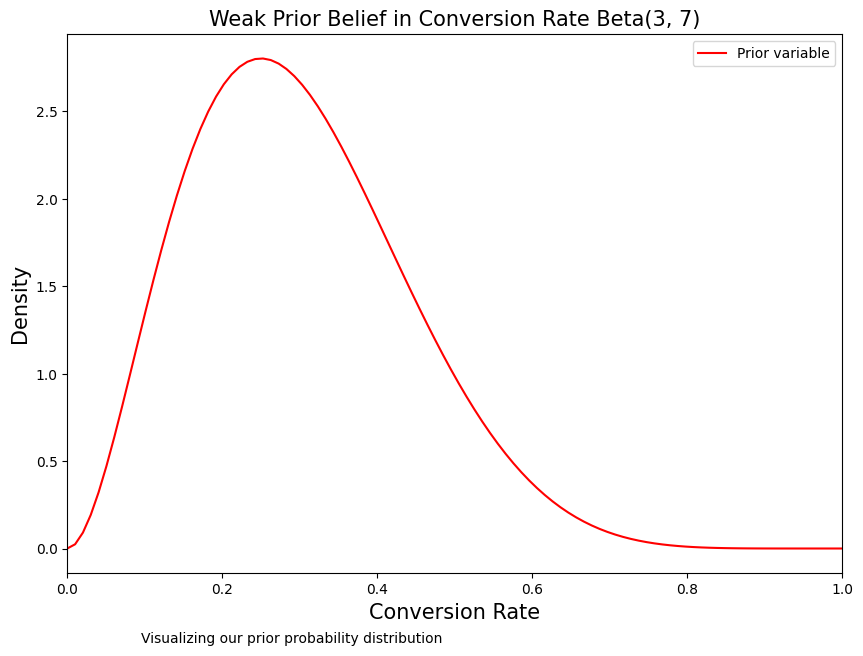

In [28]:
# https://vitalflux.com/beta-distribution-explained-with-python-examples/
#
# Set the shape paremeters
#
weak_prior_alpha, weak_prior_beta = 3, 7

#
# Generate the value between
#
prior_x = np.linspace(beta.ppf(0.0, weak_prior_alpha, weak_prior_beta),
                         beta.ppf(1.0, weak_prior_alpha, weak_prior_beta), 100)

#
# Plot the beta distribution
#
plt.figure(figsize=(10,7))
plt.xlim(0.0, 1.0)
plt.plot(prior_x, beta.pdf(prior_x, weak_prior_alpha, weak_prior_beta), 'r-',
        label = 'Prior variable')
plt.title('Weak Prior Belief in Conversion Rate Beta(3, 7)', fontsize='15')
plt.xlabel('Conversion Rate', fontsize='15')
plt.ylabel('Density', fontsize='15')
plt.legend()
plt.figtext(0.5, 0.01, 'Visualizing our prior probability distribution', wrap=True, horizontalalignment='right', fontsize=10)
plt.show()

Email Click-through Rates

|   |Clicked   |Not clicked   |Observation conversion rate   |   |
|---|---|---|---|---|
|Variant A   | 36  | 114  | 0.24  |   |
|Variant B   |  50 | 100  | 0.33  |   |

Beta(&alpha;<sub>posterior</sub>, &beta;<sub>posterior</sub>) = Beta(&alpha;<sub>likelihood</sub> + &alpha;<sub>prior</sub>, &beta;<sub>likelihood</sub> + &beta;<sub>prior</sub>)

Where

&alpha;<sub>prior</sub> = 3
&beta;<sub>prior</sub> = 7

For variant A

&alpha;<sub>likelihood</sub> = 36
&beta;<sub>likelihood</sub> = 114

For variant B

&alpha;<sub>likelihood</sub> = 50
&beta;<sub>likelihood</sub> = 100


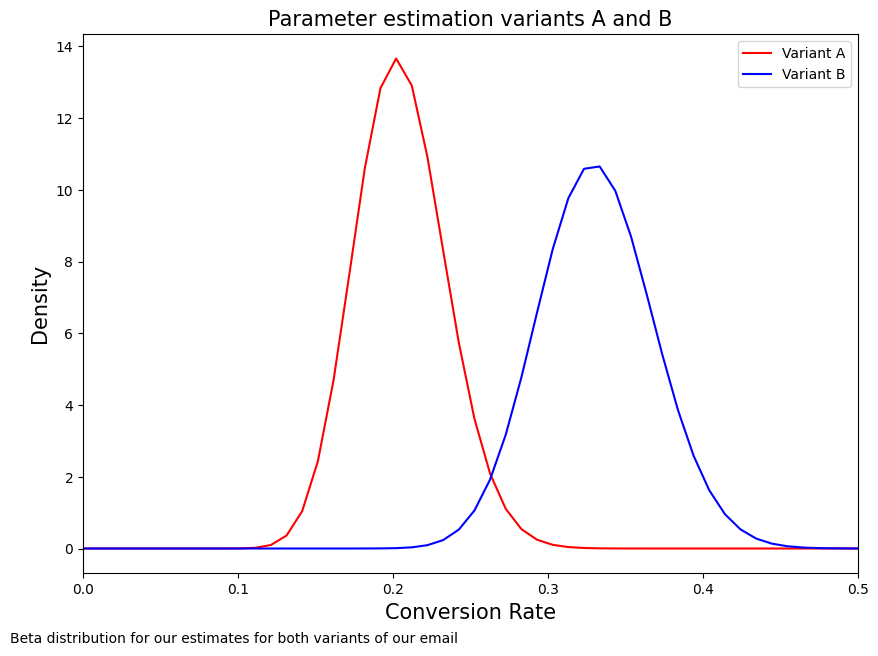

In [29]:
# https://vitalflux.com/beta-distribution-explained-with-python-examples/
#
# Set the shape paremeters
#
variant_a_alpha, variant_a_beta = 36, 144
variant_b_alpha, variant_b_beta = 50, 100

weak_prior_alpha, weak_prior_beta = 3, 7

#
# Generate the value between
#
variant_a_x = np.linspace(beta.ppf(0.0, variant_a_alpha + weak_prior_alpha, variant_a_beta + weak_prior_beta),
                         beta.ppf(1.0, variant_a_alpha + weak_prior_alpha, variant_a_beta + weak_prior_beta), 100)

variant_b_x = np.linspace(beta.ppf(0.0, variant_b_alpha + weak_prior_alpha, variant_b_beta + weak_prior_beta),
                         beta.ppf(1.0, variant_b_alpha + weak_prior_alpha, variant_b_beta + weak_prior_beta), 100)

#
# Plot the beta distribution
#
plt.figure(figsize=(10,7))
plt.xlim(0.0, 0.5)
plt.plot(variant_a_x, beta.pdf(variant_a_x, variant_a_alpha + weak_prior_alpha, variant_a_beta + weak_prior_beta), 'r-',
        label = 'Variant A')
plt.plot(variant_b_x, beta.pdf(variant_b_x, variant_b_alpha + weak_prior_alpha, variant_b_beta + weak_prior_beta), 'b-',
        label = 'Variant B')
plt.title('Parameter estimation variants A and B', fontsize='15')
plt.xlabel('Conversion Rate', fontsize='15')
plt.ylabel('Density', fontsize='15')
plt.legend()
plt.figtext(0.5, 0.01, 'Beta distribution for our estimates for both variants of our email',
            wrap=True, horizontalalignment='right', fontsize=10)
plt.show()

# Exercise 1

<b>
A director of marketing with many years of experience tells you he believes very strongly that the variant without images (B) won't perform any differently than the originial variant. How could you account for this in our model? Implement the change and see how your final conclusion changes as well?
</b>

In [31]:
no_trials = 100_000

We account for this by increasing the strength of our prior

In [44]:
strong_prior_alpha, strong_prior_beta = 300, 700

In [45]:
variant_a_samples = beta(variant_a_alpha + strong_prior_alpha,
                               variant_a_beta + strong_prior_beta).rvs(no_trials)

variant_b_samples = beta(variant_b_alpha + strong_prior_alpha,
                               variant_b_beta + strong_prior_beta).rvs(no_trials)


In [46]:
b_superior = sum(variant_b_samples > variant_a_samples) / no_trials

In [47]:
b_superior

0.8514

Our new b_superior is less than the initial weaker prior

# Exercise 2

<b>
The lead designer sees your results and insists that there's no way that variant B should perform better with no images. She feels that you should assume the conversion rate for variant B is closer to 20 percent than 30 percent. Implement a solution for this and again review the results of your analysis
</b>    